In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import math

In [11]:
m = 1024
n = 16

def weibull_fail_prob(t):
    k = 3
    lm = 50
    return 1 - math.exp(-1 * (t / lm) ** k)

def trad_fail_prob(t):
    return 1 - (1 - weibull_fail_prob(t)) * (1 - weibull_fail_prob(t))

def single_protection_fail_prob(t):
    return 1 - (((1 - weibull_fail_prob(t)) ** n) + n * weibull_fail_prob(t) * ((1 - weibull_fail_prob(t)) ** (n - 1)))**(m // n)

def double_protection_fail_prob(t):
    return 1 - (((1 - weibull_fail_prob(t)) ** n) + n * weibull_fail_prob(t) * ((1 - weibull_fail_prob(t)) ** (n - 1)) + (n * (n - 1) / 2) * (weibull_fail_prob(t) ** 2) * ((1 - weibull_fail_prob(t)) ** (n - 2)))**(m // n)

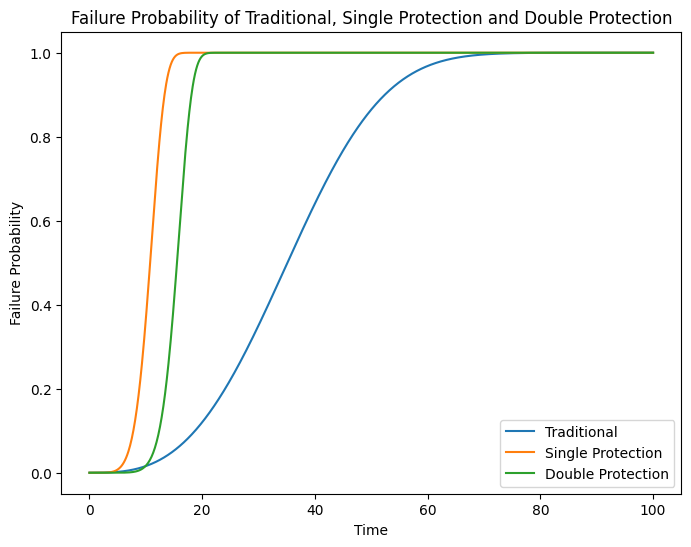

In [15]:
# Draw the figure of trad_fail_prob, single_protection_fail_prob and double_protection_fail_prob in the same figure
x = np.linspace(0, 100, 1000)
y1 = [trad_fail_prob(t) for t in x]
y2 = [single_protection_fail_prob(t) for t in x]
y3 = [double_protection_fail_prob(t) for t in x]

# adjust the figure size
plt.figure(figsize=(, 6))

plt.plot(x, y1, label='Traditional')
plt.plot(x, y2, label='Single Protection')
plt.plot(x, y3, label='Double Protection')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Failure Probability')
plt.title('Failure Probability of Traditional, Single Protection and Double Protection')
plt.show()
